## Numpy

In [2]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [3]:
import random
import numpy as np
import time

def foo():
    t1 = time.clock() 
    x = [random.random()+1 for x in range(10000)]
    t2 = time.clock()
    return t2-t1

def foo2():
    t1 = time.clock() 
    x = np.random.rand(10000)+1
    t2 = time.clock()
    return t2-t1

print(foo())
print(foo2())



0.002550974358974359
0.00791302564102564


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [4]:
%%timeit
from math import sin, cos

x = np.random.rand(10000)
x = [sin(i) + cos(i) for i in x]

2.71 ms ± 7.61 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
from math import sin, cos

x = np.random.rand(10000)
x = np.sin(x) + np.cos(x)

1000 loops, best of 3: 496 µs per loop


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [20]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def cube_sum_(x):
    x = np.array(x)
    return np.sum(x ** 3)

def almost_variance_(x):
    x = np.array(x)
    m = x.mean()
    result = np.mean((x - m) ** 4)
    return result

%timeit cube_sum(range(1000))
%timeit cube_sum_(range(1000))
%timeit almost_variance(range(1000))
%timeit almost_variance_(range(1000))

1000 loops, best of 3: 933 µs per loop
10000 loops, best of 3: 199 µs per loop
1000 loops, best of 3: 744 µs per loop
1000 loops, best of 3: 320 µs per loop


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [21]:
row = np.arange(1,11)
column = row.reshape((10,1))
print(row * column)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [31]:
a = np.arange(10)
a = a.reshape(5, 2)
m = a.mean(axis=0)
u = a.std(axis=0)
b = (a - m) / u
print(b)
print(b.mean(axis=0))
print(b.std(axis=0))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
[ 0.  0.]
[ 1.  1.]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [32]:
def closest(x, A):
    i = np.argmin(np.abs(x - A))
    return A[i]

print(closest(1.5, np.array([1, -4, 3])) == 1)

True


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.




In [34]:
def p(x, tab):
    X = np.empty(len(tab))
    X[0] = 1
    X[1:] = x
    return np.dot(tab, np.cumprod(X))


tab = np.ones(3)
print(p(3, tab))
print(np.poly1d(tab)(3))

13.0
13.0


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

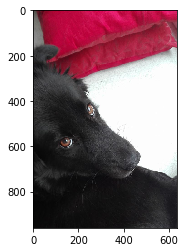

In [9]:
img = mpimg.imread('images/doggo.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

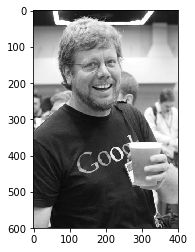

In [23]:
import matplotlib.pyplot as plt
img = plt.imread('images/Guido_van_Rossum.jpg')

def grayscale(img):
    array = np.array(img)
    r,g,b = array[:,:,0], array[:,:,1], array[:,:,2]
    gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return gray

plt.imshow(grayscale(img), "gray")
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [36]:
def inter(a, b, la):
    la = la.reshape(la.shape[0], 1)
    return la * a + (1 - la) * b

print(inter(np.array([0, 0]), np.array([1, 1]), np.array([0.1, 0.5, 0.8])))

[[ 0.9  0.9]
 [ 0.5  0.5]
 [ 0.2  0.2]]


In [5]:
x = np.array([0, 1])
y = np.array([1, 0])

# dla punktów x i y interpolacja powinna być macierzą 10x2 gdzie dla pierwszej kolumy wartości rosną od 0 do 1,
# dla drugiej maleją od  1 do 0

d = y - x
x_tiled = np.tile(x, [10,1])
i = x_tiled + np.outer(np.linspace(0, 1, 10), d)